<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/Tay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chuẩn hóa pixel về [0, 1]
data = ImageDataGenerator(rescale=1.0/255)

# Load ảnh từ thư mục -> batch
generator = data.flow_from_directory(
    '/content/drive/MyDrive/tay',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

# Load dữ liệu kiểm tra
test_generator = data.flow_from_directory(
    '/content/drive/MyDrive/tay',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,
    shuffle=False
)

class_labels = ['phai','trai']
X_batch, y_batch = next(generator)
X_batch_flat = X_batch.reshape(X_batch.shape[0], -1)


x_train, y_train = next(generator)
x_test, y_test = next(test_generator)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

model = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(len(class_labels), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_test, y_test))

Found 28 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7792 - val_accuracy: 0.4643 - val_loss: 2.3668
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.4643 - loss: 2.3668 - val_accuracy: 0.6071 - val_loss: 0.6810
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6071 - loss: 0.6810 - val_accuracy: 0.5357 - val_loss: 0.8820
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5357 - loss: 0.8820 - val_accuracy: 0.4643 - val_loss: 0.7213
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.4643 - loss: 0.7213 - val_accuracy: 0.4643 - val_loss: 0.6594
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4643 - loss: 0.6594 - val_accuracy: 0.5357 - val_loss: 0.6836
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.5357 - loss: 0.6836 - val_accuracy: 0.5714 - val_loss: 0.6449
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━

In [7]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('test_acc:%.2f'%(test_acc*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.3058e-04
test_acc:100.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Dự đoán là: phai


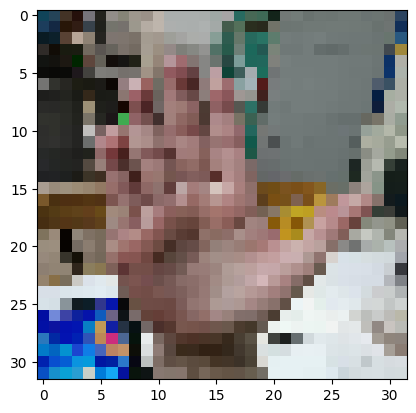

In [5]:
image_path = '/content/drive/MyDrive/tay/phai/1_right_12_jpg.rf.c5abd8d8471abf0b8ad29fd38142201f.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['phai','trai' ]
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Dự đoán là: trai


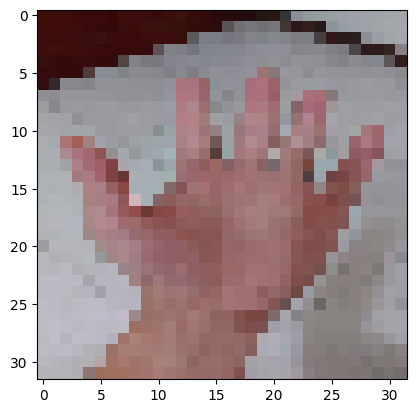

In [4]:
image_path = '/content/drive/MyDrive/tay/trai/2_left_6_jpg.rf.6eadcd914174c0c54604b8facc497cca.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['phai','trai']
print("Dự đoán là:", class_labels[predicted_index])